In [1]:
import pandas as pd
import numpy as np
from scipy import linalg as linalg
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib
matplotlib.rcParams["figure.figsize"] = (5, 5)

In [2]:
df = pd.read_csv("C:/Users/skart/Downloads/hyderabad-city-power-consumptions/Hyderabad_Power_Train.csv")
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,2017-01-01 00:20:00,NaN,74.5,0.080,0.062,NaN,29128.10127,19006.68693,19668.43373
3,2017-01-01 00:30:00,6.121,75.0,0.083,NaN,0.096,28228.86076,18361.09422,18899.27711
4,2017-01-01 00:40:00,5.921,75.7,0.081,NaN,0.085,27335.69620,17872.34043,18442.40964


In [3]:
df["Time"] = pd.DatetimeIndex(df["DateTime"]).time
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Time
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,00:00:00
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,00:10:00
2,2017-01-01 00:20:00,NaN,74.5,0.080,0.062,NaN,29128.10127,19006.68693,19668.43373,00:20:00
3,2017-01-01 00:30:00,6.121,75.0,0.083,NaN,0.096,28228.86076,18361.09422,18899.27711,00:30:00
4,2017-01-01 00:40:00,5.921,75.7,0.081,NaN,0.085,27335.69620,17872.34043,18442.40964,00:40:00


In [4]:
def ti(i):
    i = str(i)
    i = i.split(':')
    a = (int(i[0]))*60 + int(i[1]) 
    return a

df["Time"] = df["Time"].apply(lambda x : ti(x))
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Time
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434,10
2,2017-01-01 00:20:00,NaN,74.5,0.080,0.062,NaN,29128.10127,19006.68693,19668.43373,20
3,2017-01-01 00:30:00,6.121,75.0,0.083,NaN,0.096,28228.86076,18361.09422,18899.27711,30
4,2017-01-01 00:40:00,5.921,75.7,0.081,NaN,0.085,27335.69620,17872.34043,18442.40964,40


In [5]:
df.shape

(47596, 10)

In [6]:
m = len(df.index)
n = len(df.count(axis = 0)) - 4

In [7]:
df.isnull().sum()

DateTime                        0
Temperature                  5725
Humidity                     3611
Wind Speed                   4412
general diffuse flows        5653
diffuse flows                4048
Zone 1 Power Consumption        0
Zone 2  Power Consumption       0
Zone 3  Power Consumption       0
Time                            0
dtype: int64

In [8]:
df = df.fillna("NULL")
df.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption,Time
0,2017-01-01 00:00:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386,0
1,2017-01-01 00:10:00,6.414,74.5,0.083,0.07,0.085,29814.68354,19375.07599,20131.08434,10
2,2017-01-01 00:20:00,NULL,74.5,0.08,0.062,NULL,29128.10127,19006.68693,19668.43373,20
3,2017-01-01 00:30:00,6.121,75.0,0.083,NULL,0.096,28228.86076,18361.09422,18899.27711,30
4,2017-01-01 00:40:00,5.921,75.7,0.081,NULL,0.085,27335.69620,17872.34043,18442.40964,40


In [9]:
def fillNull(X):
    for i in range(m):
        if X[i] == "NULL":
            l_limit = i-1
            r_limit = i+1
            while X[l_limit] == "NULL":
                l_limit = l_limit - 1
            while X[r_limit] == "NULL":
                r_limit = r_limit + 1
            X[i] = (X[l_limit]+X[r_limit])/2

In [10]:
fillNull(df["Temperature"])
fillNull(df["Humidity"])
fillNull(df["Wind Speed"])
fillNull(df["general diffuse flows"])
fillNull(df["diffuse flows"])

C:\Users\skart\AppData\Local\Temp\ipykernel_4112\2947364279.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[i] = (X[l_limit]+X[r_limit])/2


In [11]:
(df == "NULL").sum()

DateTime                     0
Temperature                  0
Humidity                     0
Wind Speed                   0
general diffuse flows        0
diffuse flows                0
Zone 1 Power Consumption     0
Zone 2  Power Consumption    0
Zone 3  Power Consumption    0
Time                         0
dtype: int64

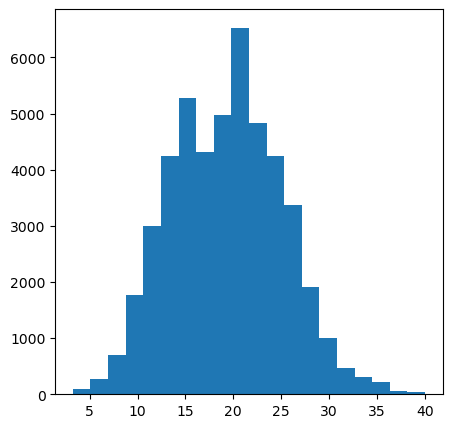

<Figure size 500x500 with 0 Axes>

In [12]:
plt.hist(df["Temperature"], bins = 20)
plt.show()
plt.clf()

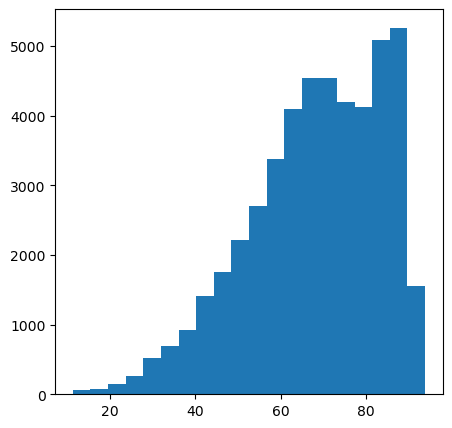

<Figure size 500x500 with 0 Axes>

In [13]:
plt.hist(df["Humidity"], bins = 20)
plt.show()
plt.clf()

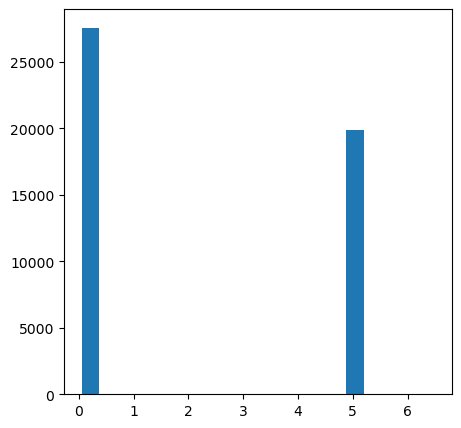

<Figure size 500x500 with 0 Axes>

In [14]:
plt.hist(df["Wind Speed"], bins = 20)
plt.show()
plt.clf()

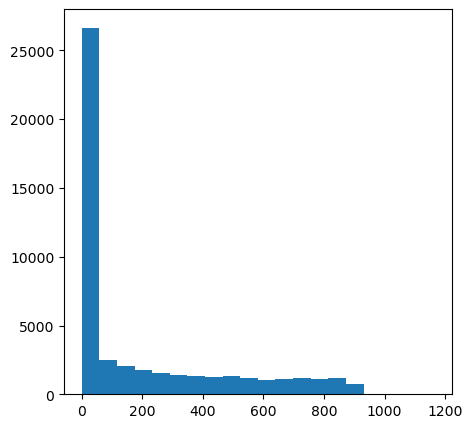

<Figure size 500x500 with 0 Axes>

In [15]:
plt.hist(df["general diffuse flows"], bins = 20)
plt.show()
plt.clf()

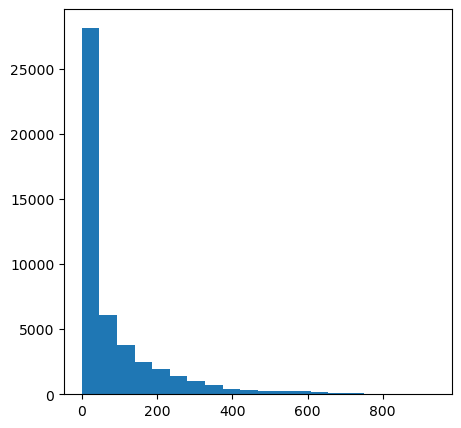

<Figure size 500x500 with 0 Axes>

In [16]:
plt.hist(df["diffuse flows"], bins = 20)
plt.show()
plt.clf()

In [17]:
X = df.loc[:, ["Time", "Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]]
X = np.matrix(X)
X = np.append(np.ones((m,1)), X, axis=1)
X = X.astype(np.int64)
X.shape

(47596, 7)

In [18]:
y1 = df.loc[:, ["Zone 1 Power Consumption"]]
y2 = df.loc[:, ["Zone 2  Power Consumption"]]
y3 = df.loc[:, ["Zone 3  Power Consumption"]]
y1 = np.array(y1)
y2 = np.array(y2)
y3 = np.array(y3)
print(y1.shape, y2.shape, y3.shape)

(47596, 1) (47596, 1) (47596, 1)


In [19]:
def find_params(X, y):
    f_arg = np.matmul(X.T, X)
    f = np.linalg.inv(f_arg)
    s = np.matmul(X.T, y)
    params = np.matmul(f, s)
    return params

In [20]:
params1 = find_params(X, y1)
params2 = find_params(X, y2)
params3 = find_params(X, y3)
print(params1, params2, params3)

[[ 1.77543786e+04]
 [ 1.16353641e+01]
 [ 3.75283871e+02]
 [-2.40978883e+00]
 [ 2.89893456e+01]
 [-3.61742613e-01]
 [-3.93150979e+00]] [[ 1.07412141e+04]
 [ 7.27040793e+00]
 [ 2.98044668e+02]
 [-8.90580091e+00]
 [ 1.14055033e+02]
 [-6.89244771e-01]
 [-2.52234098e+00]] [[ 7.45413111e+03]
 [ 6.55205393e+00]
 [ 4.64727140e+02]
 [-2.24511912e+01]
 [ 1.88158722e+02]
 [-4.04835623e+00]
 [-5.86559077e+00]]


In [21]:
y_pred1 = np.matmul(X, params1)
y_pred2 = np.matmul(X, params2)
y_pred3 = np.matmul(X, params3)

In [22]:
def mape(y, y_test):
    a = (np.fabs(y - y_test)/y).sum()
    mape = (a*100)/m
    return mape

In [23]:
mape1 = mape(y1, y_pred1)
mape2 = mape(y2, y_pred2)
mape3 = mape(y3, y_pred3)
print(mape1, mape2, mape3)

11.122463417534686 13.686869467805968 24.239530139950386


In [24]:
df_test = pd.read_csv("C:/Users/skart/Downloads/hyderabad-city-power-consumptions/Hyderabad_Power_Test.csv")
df_test.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows
0,2017-12-01 00:00:00,19.07,55.77,0.086,0.048,0.100
1,2017-12-01 00:10:00,18.99,56.70,0.080,0.066,0.093
2,2017-12-01 00:20:00,18.88,58.11,0.078,0.070,0.104
3,2017-12-01 00:30:00,18.78,58.98,0.080,0.040,0.100
4,2017-12-01 00:40:00,18.77,59.98,0.078,0.044,0.093


In [25]:
df_test["Time"] = pd.DatetimeIndex(df_test["DateTime"]).time
df_test.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Time
0,2017-12-01 00:00:00,19.07,55.77,0.086,0.048,0.100,00:00:00
1,2017-12-01 00:10:00,18.99,56.70,0.080,0.066,0.093,00:10:00
2,2017-12-01 00:20:00,18.88,58.11,0.078,0.070,0.104,00:20:00
3,2017-12-01 00:30:00,18.78,58.98,0.080,0.040,0.100,00:30:00
4,2017-12-01 00:40:00,18.77,59.98,0.078,0.044,0.093,00:40:00


In [26]:
df_test["Time"] = df_test["Time"].apply(lambda x : ti(x))
df_test.head()

,DateTime,Temperature,Humidity,Wind Speed,general diffuse flows,diffuse flows,Time
0,2017-12-01 00:00:00,19.07,55.77,0.086,0.048,0.100,0
1,2017-12-01 00:10:00,18.99,56.70,0.080,0.066,0.093,10
2,2017-12-01 00:20:00,18.88,58.11,0.078,0.070,0.104,20
3,2017-12-01 00:30:00,18.78,58.98,0.080,0.040,0.100,30
4,2017-12-01 00:40:00,18.77,59.98,0.078,0.044,0.093,40


In [27]:
X_test = np.matrix(df_test.loc[:, ["Time", "Temperature", "Humidity", "Wind Speed", "general diffuse flows", "diffuse flows"]])
m_test = len(df_test.index)
X_test = np.append(np.ones((m_test, 1)), X_test, axis=1)
y_pred1 = np.matmul(X_test, params1)
y_pred2 = np.matmul(X_test, params2)
y_pred3 = np.matmul(X_test, params3)

In [29]:
solution = pd.DataFrame(df_test["DateTime"])
solution["Zone 1 Power Consumption"] = y_pred1
solution["Zone 2 Power Consumption"] = y_pred2
solution["Zone 3 Power Consumption"] = y_pred3
solution.head()

,DateTime,Zone 1 Power Consumption,Zone 2 Power Consumption,Zone 3 Power Consumption
0,2017-12-01 00:00:00,24778.730705,15937.772813,15079.775491
1,2017-12-01 00:10:00,24862.667605,15977.671843,15086.077488
2,2017-12-01 00:20:00,24934.239546,16004.775217,15068.364830
3,2017-12-01 00:30:00,25011.052841,16040.185660,15068.401350
4,2017-12-01 00:40:00,25121.211949,16100.790281,15106.471975


In [35]:
solution.to_csv("Solution_Blend360.csv", index = False)

In [36]:
solution.shape

(4320, 4)